## Homework 4
From Chapter 5, found on pages 225-226 of ISLP

*In Chapter 4, we used logistic regression to predict the probability of default using income and balance on the `Default` data set. We will now estimate the test error of this logistic regression model using the validation set approach. Do not forget to set a random seed before beginning your analysis.*

In [1]:
# Import standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import random
import warnings
warnings.filterwarnings('ignore') # mute warning messages
# Import specific objects
from ISLP import load_data
from ISLP import confusion_table
from ISLP.models import contrast
from ISLP.models import (ModelSpec as MS,
                         summarize)
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Load Default data
Default = load_data('Default')
Default

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879
...,...,...,...,...
9995,No,No,711.555020,52992.378914
9996,No,No,757.962918,19660.721768
9997,No,No,845.411989,58636.156984
9998,No,No,1569.009053,36669.112365


(a) Fit a logistic regression model that uses income and balance to predict default.

In [3]:
#Add your code here
# Extract features and target
X = Default[['income', 'balance']]
y = Default['default']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)
# Predict on the testing set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9695


Using the validation set approach, estimate the test error of this model. In order to do this, you must perform the following steps:

(i) Split the sample set into a training set and a validation set.

(ii)  Fit a multiple logistic regression model using only the training observations.

(iii)  Obtain a prediction of default status for each individual in the validation set by computing the posterior probability of default for that individual, and classifying the individual to the default category if the posterior probability is greater than 0.5.

(vi)  Compute the validation set error, which is the fraction of the observations in the validation set that are misclassified.

In [5]:
#Add your code here
# 1 Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 2 Initialize and fit the logistic regression model using training data
model = LogisticRegression()
model.fit(X_train, y_train)

# 3 Obtain predicted probabilities for default for validation set
y_pred_proba = model.predict_proba(X_val)

# Classify individuals to default category based on posterior probability > 0.5
y_pred = (y_pred_proba[:, 1] > 0.5).astype(int)

# Map 'No' to 0 and 'Yes' to 1
y_val_binary = y_val.map({'No': 0, 'Yes': 1})

# 4 Compute validation set error (misclassification rate)
validation_error = 1 - accuracy_score(y_val_binary, y_pred)
print("Validation Set Error:", validation_error)


Validation Set Error: 0.03049999999999997


(c)  Repeat the process in (b) three times, using three different splits of the observations into a training set and a validation set. Comment on the results obtained.

0.0249


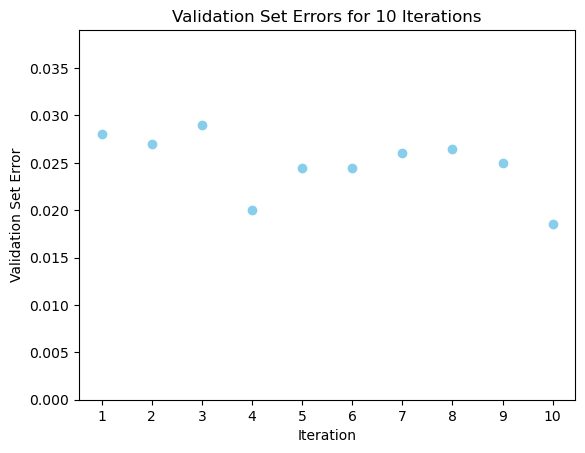

In [11]:
#Add your code here
# Initialize an empty list to store validation errors
validation_errors = []
iterations = 10
# Repeat the process three times
for i in range(iterations):
    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=i)
    
    # Fit a logistic regression model using training data
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # Obtain predicted probabilities for default for validation set
    y_pred_proba = model.predict_proba(X_val)
    
    # Classify individuals to default category based on posterior probability > 0.5
    y_pred = (y_pred_proba[:, 1] > 0.5).astype(int)
    
    # Map 'No' to 0 and 'Yes' to 1 in y_val
    y_val_binary = y_val.map({'No': 0, 'Yes': 1})
    
    # Compute validation set error (misclassification rate)
    validation_error = 1 - accuracy_score(y_val_binary, y_pred)
    validation_errors.append(validation_error)
    
# Print validation errors
# for i, error in enumerate(validation_errors):
#     print(f"Validation Set Error {i+1}: {error}")
print(np.mean(validation_errors))
# Plot validation errors
plt.scatter(range(1, iterations+1), validation_errors, color='skyblue')
plt.xlabel('Iteration')
plt.ylabel('Validation Set Error')
plt.title(f'Validation Set Errors for {iterations} Iterations')
plt.xticks(range(1, iterations+ 1))
plt.ylim(0, max(validation_errors) + 0.01)  # Adjust y-axis limits for better visualization
plt.show()

(d) Now consider a logistic regression model that predicts the probability of default using income, balance, and a dummy variable for student. Estimate the test error for this model using the validation set approach. Comment on whether or not including a dummy variable for student leads to a reduction in the test error rate.
(Help : if your model does not converge, consider increasing the 'max_iter' inside of your model)

0.024999999999999988


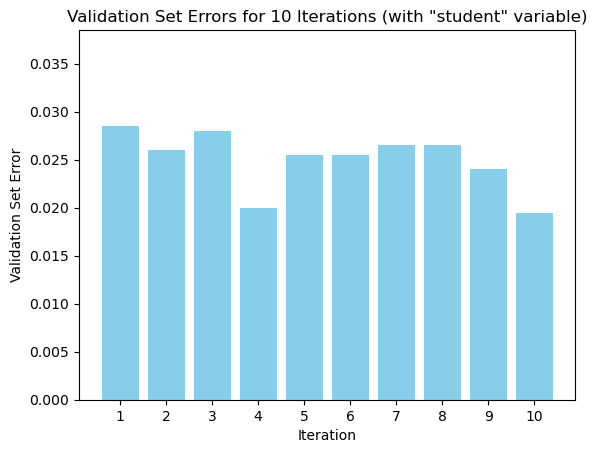

In [15]:
#Add your code here
from sklearn.preprocessing import LabelEncoder
# Label encode the 'student' variable
label_encoder = LabelEncoder()
Default['student_encoded'] = label_encoder.fit_transform(Default['student'])

# Update the features and target variables
X_with_student = Default[['income', 'balance', 'student_encoded']]
y = Default['default']

# Initialize an empty list to store validation errors
validation_errors = []
iterations =10
# Repeat the process three times
for i in range(iterations):
    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_with_student, y, test_size=0.2, random_state=i)
    
    # Fit a logistic regression model using training data
    model = LogisticRegression(max_iter=1000)  # Increase max_iter if the model does not converge
    model.fit(X_train, y_train)
    
    # Obtain predicted probabilities for default for validation set
    y_pred_proba = model.predict_proba(X_val)
    
    # Classify individuals to default category based on posterior probability > 0.5
    y_pred = (y_pred_proba[:, 1] > 0.5).astype(int)
    
    # Map 'No' to 0 and 'Yes' to 1 in y_val
    y_val_binary = y_val.map({'No': 0, 'Yes': 1})
    
    # Compute validation set error (misclassification rate)
    validation_error = 1 - accuracy_score(y_val_binary, y_pred)
    validation_errors.append(validation_error)

# # Print validation errors
# for i, error in enumerate(validation_errors):
#     print(f"Validation Set Error {i+1}: {error}")
print(np.mean(validation_errors))
# Plot validation errors
plt.bar(range(1, iterations + 1), validation_errors, color='skyblue')
plt.xlabel('Iteration')
plt.ylabel('Validation Set Error')
plt.title(f'Validation Set Errors for {iterations} Iterations (with "student" variable)')
plt.xticks(range(1, iterations + 1))
plt.ylim(0, max(validation_errors) + 0.01)  # Adjust y-axis limits for better visualization
plt.show()

- The test error rates for the logistic regression model with and without the dummy variable for 'student' are similar, it suggests that including the 'student' variable does not lead to a reduction in the test error rate.

- This result implies that the additional information provided by the 'student' variable does not significantly improve the model's ability to predict default status compared to using only 'income' and 'balance' as features.

- It's essential to interpret this result in the context of the specific dataset and problem domain. It's possible that the 'student' variable may not be strongly correlated with default status or may not capture additional information beyond what is already provided by 'income' and 'balance'.

- Further analysis, such as feature importance ranking or exploring interactions between features, may provide insights into why including the 'student' variable does not lead to improved model performance. Additionally, experimenting with different feature engineering techniques or alternative model algorithms could be explored to potentially improve predictive performance.

## Additional Practice Questions: 
- Explain the concept of a random seed to a non-technical audience. 
- How would you describe this exercise in an interview to both a technical and non-technical interviewer?
- Can you think of a business context where this exercise would have applications?

1. Random Seed Explanation to a Non-Technical Audience:

- Imagine you have a magical garden where you want to grow some unique flowers. Now, to make sure that every time you visit your garden, you see the same arrangement of flowers, you decide to use a special tool called a "magic wand." This magic wand helps you create the arrangement by giving it a secret number, which we call a "random seed." Now, no matter how many times you use the wand with the same seed number, you'll always get the exact same arrangement of flowers. But if you change the seed number, you'll get a completely different arrangement, almost like a brand new garden!

2. Describing the Exercise in an Interview:

- Technical Interviewer: We're going to explore the process of estimating the test error for a machine learning model using **the validation set approach**. We'll **split** our dataset into two parts: a training set to train the model and a validation set to evaluate its performance. Then, we'll repeat this process **multiple times** to get a robust estimate of how well our model generalizes to unseen data.
- Non-Technical Interviewer: We'll be using a method to assess how well our predictive model works with new data. Think of it like studying for a test—you'll review some questions and then test yourself to see how well you remember the answers. We'll do this a few times to make sure our study methods are consistent and give us a good idea of how well we've learned the material.

3. Business Context for the Exercise:

- This exercise is highly relevant in various business contexts where predictive modeling is used. For example:

- Financial Services: Banks and lending institutions can use this approach to assess the risk of default on loans by analyzing customers' financial attributes.
- E-commerce: Online retailers can estimate the likelihood of customer churn (i.e., customers stopping their subscriptions or leaving the platform) based on their behavior and purchase history.
- Healthcare: Hospitals can predict readmission rates for patients based on their medical history and treatment outcomes to optimize resource allocation and improve patient care.